In [13]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy.optimize import curve_fit


In [14]:
# First read in the unvalidated GALAH DR4 file
galah = Table.read('../spectrum_post_processing//galah_dr4_allspec_not_validated.fits')
galah = galah[galah['flag_sp'] < 64]

In [15]:
gbs = Table.read('data/GALAH_GBS2.1.fits')

In [16]:
gbs[-1]['sobject_id'] = 210115002201239

In [17]:
gbs_galah_match = []
galah_gbs_match = []

for each_sobject_id in range(len(galah['sobject_id'])):
    if galah['sobject_id'][each_sobject_id] not in [140709001901194,150204002101256]:
        try:
            side_a = np.where(
                    galah['sobject_id'][each_sobject_id] == gbs['sobject_id']
                )[0][0]
            side_b = each_sobject_id
            gbs_galah_match.append(side_a)
            galah_gbs_match.append(side_b)
        except:
            pass
gbs_galah_match = np.array(gbs_galah_match)
galah_gbs_match = np.array(galah_gbs_match)


In [18]:
gbs[gbs_galah_match][:10]

sobject_id,P2,P3,P4,P5,StarID1,StarID2,StarID3,StarID4,RAJ2000,DEJ2000,SpType,Teff,e_Teff,logg,e_logg,__Fe_H_,e__Fe_H_,logeps_Mg_,e_logeps_Mg_,logeps_Si_,e_logeps_Si_,logeps_Ca_,e_logeps_Ca_,logeps_Ti_,e_logeps_Ti_,logeps_Sc_,e_logeps_Sc_,logeps_V_,e_logeps_V_,logeps_Cr_,e_logeps_Cr_,logeps_Mn_,e_logeps_Mn_,logeps_Co_,e_logeps_Co_,logeps_Ni_,e_logeps_Ni_,__Mg_H_,e__Mg_H_,__Si_H_,e__Si_H_,__Ca_H_,e__Ca_H_,__Ti_H_,e__Ti_H_,__Sc_H_,e__Sc_H_,__V_H_,e__V_H_,__Cr_H_,e__Cr_H_,__Mn_H_,e__Mn_H_,__Co_H_,e__Co_H_,__Ni_H_,e__Ni_H_,SimbadName,GroupID,GroupSize
,,,,,,,,,deg,deg,,K,K,[cm/s2],[cm/s2],[Sun],[Sun],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[-],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],[Sun],,,
int64,bytes2,bytes2,bytes2,bytes2,bytes9,bytes8,bytes9,int64,float64,float64,bytes15,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes9,int32,int32
131216002601003,P2,P3,P4,P5,mu Leo,HD85503,HIP48455,643819484616249984,148.19090416666666,26.006952777777773,K2III,4474,60,2.51,0.11,0.25,0.15,8.12,0.11,8.01,0.09,6.6,0.12,5.22,0.1,3.45,0.06,4.23,0.08,5.91,0.08,5.39,0.2,5.34,0.09,6.5,0.12,0.466,0.132,0.522,0.132,0.28,0.139,0.322,0.157,0.23,0.106,0.296,0.13,0.335,0.134,0.087,0.287,0.452,0.162,0.324,0.154,mu Leo,1,2
131220004401099,P2,P3,P4,P5,ksi Hya,HD100407,HIP56343,3478394889482871808,173.25047916666665,-31.85762222222222,G7III,5044,40,2.87,0.02,0.16,0.2,7.68,0.11,7.57,0.06,6.39,0.07,4.93,0.08,3.28,0.11,3.98,0.07,5.66,0.04,5.2,0.1,4.88,0.08,6.22,0.08,0.034,0.118,0.077,0.079,0.068,0.101,0.028,0.1,0.062,0.137,0.053,0.094,0.077,0.062,-0.105,0.18,-0.009,0.094,0.035,0.118,ksi Hya,3,2
140708003401078,P2,P3,P4,P5,mu Ara,HD160691,HIP86796,5945941905576552448,266.03625416666665,-51.83405277777777,G3IV-V,--,--,4.3,0.03,0.35,0.13,8.01,0.04,7.82,0.04,6.64,0.05,5.29,0.05,3.62,0.06,4.36,0.03,5.95,0.04,5.73,0.04,5.31,0.03,6.6,0.05,0.36,0.063,0.327,0.045,0.32,0.069,0.388,0.08,0.401,0.076,0.427,0.067,0.37,0.058,0.43,0.087,0.424,0.06,0.416,0.069,mu Ara,--,--
140708005801203,P2,P3,P4,P5,bet Hyi,HD2151,HIP2021,4683897617108298752,6.437791666666666,-77.25424722222222,G0V,5873,45,3.98,0.02,-0.04,0.06,7.61,0.04,7.42,0.03,6.26,0.06,4.83,0.04,3.18,0.04,3.85,0.04,5.48,0.05,5.18,0.03,4.81,0.03,6.09,0.03,-0.038,0.05,-0.067,0.037,-0.061,0.064,-0.074,0.055,-0.043,0.047,-0.079,0.059,-0.098,0.063,-0.121,0.062,-0.077,0.045,-0.085,0.045,bet Hyi,--,--
140708006401203,P2,P3,P4,P5,tau Cet,HD10700,HIP8102,2452378776434276864,26.017012499999996,-15.937480555555554,G8.5V,5414,21,--,--,-0.49,0.03,7.43,0.03,7.14,0.03,6.03,0.05,4.74,0.07,2.88,0.06,3.68,0.03,5.16,0.04,4.79,0.04,4.54,0.03,5.73,0.04,-0.224,0.054,-0.354,0.04,-0.291,0.086,-0.165,0.099,-0.343,0.075,-0.248,0.099,-0.417,0.065,-0.511,0.071,-0.35,0.075,-0.447,0.078,tau Cet,--,--
140709004401117,P2,P3,P4,P5,gam Sge,HD189319,HIP98337,1823067317695767552,299.6892875,19.49214722222222,M0III,3807,49,1.05,0.32,-0.17,0.39,7.69,0.1,7.64,0.1,6.03,0.09,4.63,0.1,2.9,0.29,3.62,0.16,5.43,0.06,--,--,4.79,0.09,6.01,0.13,0.042,0.109,0.15,0.241,-0.292,0.183,-0.266,0.202,-0.319,0.348,-0.314,0.223,-0.152,0.144,--,--,-0.101,0.211,-0.174,0.274,gam Sge,--,--
140710000801284,P2,P3,P4,P5,HD 107328,HD107328,HIP60172,3701693091058501632,185.0874208333333,3.312572222222222,K0IIIb,4496,59,2.09,0.13,-0.33,0.16,7.57,0.07,7.37,0.05,6.0,0.07,4.77,0.04,2.88,0.05,3.73,0.06,5.17,0.04,4.62,0.05,4.71,0.02,5.86,0.03,-0.079,0.106,-0.119,0.087,-0.321,0.117,-0.131,0.115,-0.342,0.091,-0.197,0.126,-0.41,0.069,-0.68,0.125,-0.18,0.082,-0.315,0.074,HD 107328,--,--
140710001701284,P2,P3,P4,P5,ksi Hya,HD100407,HIP56343,3478394889482871808,173.25047916666665

In [19]:
galah[galah_gbs_match][:10]

sobject_id,tmass_id,gaiadr3_source_id,flag_sp,chi2_sp,model_name,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,vmic,e_vmic,vsini,e_vsini,li_fe,e_li_fe,flag_li_fe,c_fe,e_c_fe,flag_c_fe,n_fe,e_n_fe,flag_n_fe,o_fe,e_o_fe,flag_o_fe,na_fe,e_na_fe,flag_na_fe,mg_fe,e_mg_fe,flag_mg_fe,al_fe,e_al_fe,flag_al_fe,si_fe,e_si_fe,flag_si_fe,k_fe,e_k_fe,flag_k_fe,ca_fe,e_ca_fe,flag_ca_fe,sc_fe,e_sc_fe,flag_sc_fe,ti_fe,e_ti_fe,flag_ti_fe,v_fe,e_v_fe,flag_v_fe,cr_fe,e_cr_fe,flag_cr_fe,mn_fe,e_mn_fe,flag_mn_fe,co_fe,e_co_fe,flag_co_fe,ni_fe,e_ni_fe,flag_ni_fe,cu_fe,e_cu_fe,flag_cu_fe,zn_fe,e_zn_fe,flag_zn_fe,rb_fe,e_rb_fe,flag_rb_fe,sr_fe,e_sr_fe,flag_sr_fe,y_fe,e_y_fe,flag_y_fe,zr_fe,e_zr_fe,flag_zr_fe,mo_fe,e_mo_fe,flag_mo_fe,ru_fe,e_ru_fe,flag_ru_fe,ba_fe,e_ba_fe,flag_ba_fe,la_fe,e_la_fe,flag_la_fe,ce_fe,e_ce_fe,flag_ce_fe,nd_fe,e_nd_fe,flag_nd_fe,sm_fe,e_sm_fe,flag_sm_fe,eu_fe,e_eu_fe,flag_eu_fe,sb2_rv_16,sb2_rv_50,sb2_rv_84,ew_h_beta,ew_h_alpha,ew_k_is,sigma_k_is,rv_k_is,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,snr [4]
int64,bytes16,int64,int64,float32,bytes16,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
131216002601003,09524585+2600248,643819484617141504,8,11.417083,4500_2.00_0.00,4499.0757,0.5604881,2.4453762,0.001982448,0.22083943,0.0007825262,0,1.564405,0.0007373396,3.462567,0.005493523,-1.5581433,0.003735065,0,-0.10012323,0.0020177977,0,0.37067422,0.0015928206,0,-0.24291372,0.0030620669,0,0.4653613,0.0016654489,0,0.004115656,0.0010759811,0,-0.25592104,0.0036681944,0,0.1705636,0.0011558784,0,-0.99649745,0.0066377423,1,0.0309139,0.0013730661,0,-0.0014554728,0.001208049,0,0.06180691,0.0005855659,0,0.24121578,0.0008533639,0,0.029303363,0.0006438847,0,0.20792685,0.0011765367,0,0.37874418,0.00077142654,0,0.118806526,0.00057690573,0,0.56738037,0.0029542316,0,-0.069573894,0.0045932643,0,--,--,2,-0.14399041,0.0041872994,0,-0.20070565,0.0030238028,0,0.088320225,0.0017406724,0,0.27558795,0.0052653425,0,-0.51211184,0.005328177,0,-0.1133381,0.005317481,0,-0.14781646,0.0021930614,0,-0.5423752,0.0022116508,0,-0.33227813,0.0020582255,0,-0.6148413,0.0028132594,0,1.7109855,0.0068526343,0,--,70.0,--,0.08136348,0.0696296,0.069721386,0.24448918,-2.5794218,0.022701867,0.10523918,15.532752,0.03284929,0.38672894,-30.481337,0.0072859074,0.078469284,28.056826,482.95697 .. 280.02988
131220004401099,11330013-3151273,3478394889483944320,28,1.8862627,5000_3.50_0.00,5000.829,3.5985982,3.1698818,0.012624278,-0.10977735,0.0059124427,0,0.31525642,0.017404122,23.786362,0.050888136,-0.1407177,0.10246067,0,0.7505945,0.009801021,0,0.74382603,0.009913335,0,1.778096,0.018993342,0,0.18203044,0.01636757,0,0.059807435,0.017419754,0,-0.31418765,0.037960846,0,0.07352774,0.011522782,0,-1.3613663,0.07659248,1,-0.20835477,0.023158966,0,0.06047342,0.017152887,0,0.16394833,0.009980714,0,0.1502201,0.0137077095,0,0.28999215,0.009836994,0,-0.36730015,0.015208012,0,0.3133093,0.0119084325,0,0.18154198,0.008802932,0,0.32404363,0.0205561,0,0.58993083,0.029315002,0,--,--,2,--,--,2,1.0172535,0.035826344,0,0.57322276,0.030035295,0,--,--,2,--,--,2,0.21961926,0.03964866,0,1.362485

In [20]:
galah[galah_gbs_match][10:]

sobject_id,tmass_id,gaiadr3_source_id,flag_sp,chi2_sp,model_name,teff,e_teff,logg,e_logg,fe_h,e_fe_h,flag_fe_h,vmic,e_vmic,vsini,e_vsini,li_fe,e_li_fe,flag_li_fe,c_fe,e_c_fe,flag_c_fe,n_fe,e_n_fe,flag_n_fe,o_fe,e_o_fe,flag_o_fe,na_fe,e_na_fe,flag_na_fe,mg_fe,e_mg_fe,flag_mg_fe,al_fe,e_al_fe,flag_al_fe,si_fe,e_si_fe,flag_si_fe,k_fe,e_k_fe,flag_k_fe,ca_fe,e_ca_fe,flag_ca_fe,sc_fe,e_sc_fe,flag_sc_fe,ti_fe,e_ti_fe,flag_ti_fe,v_fe,e_v_fe,flag_v_fe,cr_fe,e_cr_fe,flag_cr_fe,mn_fe,e_mn_fe,flag_mn_fe,co_fe,e_co_fe,flag_co_fe,ni_fe,e_ni_fe,flag_ni_fe,cu_fe,e_cu_fe,flag_cu_fe,zn_fe,e_zn_fe,flag_zn_fe,rb_fe,e_rb_fe,flag_rb_fe,sr_fe,e_sr_fe,flag_sr_fe,y_fe,e_y_fe,flag_y_fe,zr_fe,e_zr_fe,flag_zr_fe,mo_fe,e_mo_fe,flag_mo_fe,ru_fe,e_ru_fe,flag_ru_fe,ba_fe,e_ba_fe,flag_ba_fe,la_fe,e_la_fe,flag_la_fe,ce_fe,e_ce_fe,flag_ce_fe,nd_fe,e_nd_fe,flag_nd_fe,sm_fe,e_sm_fe,flag_sm_fe,eu_fe,e_eu_fe,flag_eu_fe,sb2_rv_16,sb2_rv_50,sb2_rv_84,ew_h_beta,ew_h_alpha,ew_k_is,sigma_k_is,rv_k_is,ew_dib5780,sigma_dib5780,rv_dib5780,ew_dib5797,sigma_dib5797,rv_dib5797,ew_dib6613,sigma_dib6613,rv_dib6613,snr [4]
int64,bytes16,int64,int64,float32,bytes16,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
140710008301032,03431490-0945490,5164120762333028736,8,8.968624,5000_4.00_0.00,5106.049,0.3533267,3.9116447,0.00059465645,0.09697063,0.0002856627,0,1.0900693,0.00057849364,2.0696404,0.005674077,-0.5193271,0.0019043519,0,0.15077835,0.0010173818,0,0.15490758,0.0008791658,0,0.21888706,0.0023261504,0,0.086119264,0.00066591264,0,0.09055354,0.0005183028,0,0.118547544,0.001857372,0,0.042246137,0.0004094422,0,-0.0376027,0.0028883268,0,0.032444257,0.0007179974,0,0.062289737,0.0004769936,0,0.108781934,0.00029105146,0,0.26703954,0.0003297142,0,0.0071070585,0.00030268502,0,0.03254123,0.00043115512,0,0.14014623,0.0004008365,0,0.04436197,0.0002439737,0,0.15411901,0.0010201578,0,-0.08906752,0.0012176771,0,--,--,2,--,--,2,-0.021255203,0.0011546433,0,0.05373454,0.0012066884,0,--,--,2,--,--,2,-0.040593117,0.0019475095,0,--,--,2,--,--,2,-0.061661206,0.00075161847,0,-0.28789985,0.0023917041,0,--,--,2,--,--,--,-0.029346274,-0.036438104,0.011650551,0.16074702,-130.26138,0.012349157,0.09383324,41.407387,0.014073996,0.4135793,-38.1247,0.0065891957,0.32165915,20.821848,1344.2604 .. 552.48474
140710009001032,03402202-0313005,3250489115709122560,8,1.425762,5750_4.00_-0.75,5820.5605,1.7199377,4.1009865,0.0046311575,-0.8069213,0.0020047112,0,1.0047487,0.011797051,3.869447,0.04712833,1.5623,0.008243003,0,0.4104752,0.0035457727,0,--,--,2,0.443021,0.018058755,0,0.04226011,0.0064669466,0,0.3319906,0.005195772,0,-0.43706733,0.09800643,1,0.21250257,0.0056617395,0,0.32428175,0.025762882,0,0.25549522,0.0060487404,0,0.10635279,0.006065436,0,0.27982712,0.0035266478,0,0.07397172,0.00699811,0,0.013654938,0.0033828358,0,-0.27656564,0.0028541246,0,0.047842555,0.0060203625,0,-0.022824524,0.0024443702,0,-0.051876605,0.012936942,0,0.0999932,0.007409633,0,--,--,2,--,--,2,0.056751482,0.007211436,0,--,--,2,--,--,2,--,--,2,0.030540098,0.014853738,0,--,--,2,--,--,2,--,--,2,--,--,2,--,--,2,--,--,--,-0.038555145,-0.006403574,-0.0029092862,0.09783266,-32.035236,-8.317685e-05,0.

In [21]:
comparison = dict()

comparison['GBS'] = gbs['StarID1'][gbs_galah_match]
comparison['sobject_id'] = gbs['sobject_id'][gbs_galah_match]
comparison['teff_gbs'] = np.array([float(gbs['Teff'][gbs_galah_match][x]) for x in range(len(gbs['Teff'][gbs_galah_match]))])
comparison['teff_gbs'][comparison['teff_gbs'] < 0] = np.NaN
comparison['logg_gbs'] = gbs['logg'][gbs_galah_match]
comparison['fe_h_gbs'] = gbs['__Fe_H_'][gbs_galah_match]

comparison['e_teff_gbs'] = np.array([float(gbs['e_Teff'][gbs_galah_match][x]) for x in range(len(gbs['e_Teff'][gbs_galah_match]))])
comparison['e_logg_gbs'] = gbs['e_logg'][gbs_galah_match]
comparison['e_fe_h_gbs'] = gbs['e__Fe_H_'][gbs_galah_match]

comparison['teff'] = galah['teff'][galah_gbs_match]
comparison['e_teff'] = galah['e_teff'][galah_gbs_match]
comparison['logg'] = galah['logg'][galah_gbs_match]
comparison['e_logg'] = galah['e_logg'][galah_gbs_match]
comparison['fe_h'] = galah['fe_h'][galah_gbs_match]
comparison['e_fe_h'] = galah['fe_h'][galah_gbs_match]

/var/folders/fk/njpttmdx5yb1y0hp7br9z1cc0000gn/T/ipykernel_37904/1170838571.py:5: UserWarning: Warning: converting a masked element to nan.
  comparison['teff_gbs'] = np.array([float(gbs['Teff'][gbs_galah_match][x]) for x in range(len(gbs['Teff'][gbs_galah_match]))])
/var/folders/fk/njpttmdx5yb1y0hp7br9z1cc0000gn/T/ipykernel_37904/1170838571.py:10: UserWarning: Warning: converting a masked element to nan.
  comparison['e_teff_gbs'] = np.array([float(gbs['e_Teff'][gbs_galah_match][x]) for x in range(len(gbs['e_Teff'][gbs_galah_match]))])


In [22]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [23]:
lbol_bias = {}

for each_param in ['teff','logg','fe_h']:
    good = (
        np.isfinite(comparison[each_param]) & np.isfinite(comparison[each_param+'_gbs'])
        )

    lbol_bias[each_param] = weighted_avg_and_std(
              comparison[each_param][good] - comparison[each_param+'_gbs'][good],
              1./(comparison['e_'+each_param][good]**2+comparison['e_'+each_param+'_gbs'][good]**2))
    
good = (
        np.isfinite(comparison[each_param]) & np.isfinite(comparison[each_param+'_gbs'])
        )

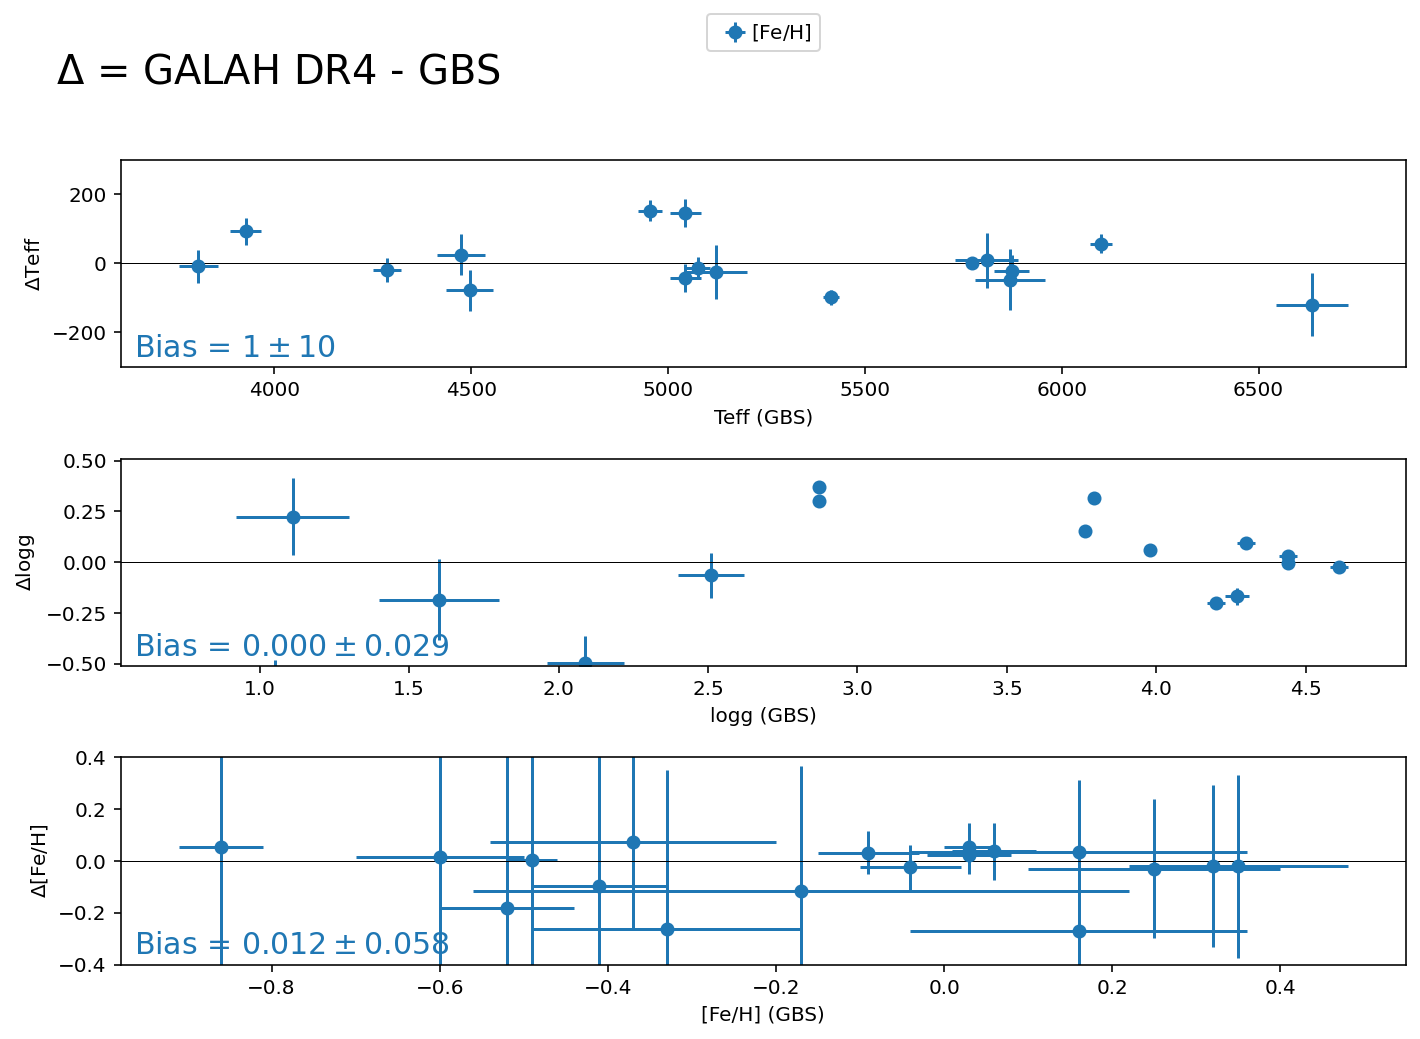

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,7.5))

s1 = ax1.errorbar(
    comparison['teff_gbs'],
    comparison['teff'] - comparison['teff_gbs'],
    xerr = comparison['e_teff_gbs'],
    yerr = np.sqrt(comparison['e_teff_gbs']**2 + comparison['e_teff']**2),
    fmt = 'o',
    label=r'$\mathrm{[Fe/H]}$'
    )

s2 = ax2.errorbar(
    comparison['logg_gbs'],
    comparison['logg'] - comparison['logg_gbs'],
    xerr = comparison['e_logg_gbs'],
    yerr = np.sqrt(comparison['e_logg_gbs']**2 + comparison['e_logg']**2),
    fmt = 'o'
    )

s3 = ax3.errorbar(
    comparison['fe_h_gbs'],
    comparison['fe_h'] - comparison['fe_h_gbs'],
    xerr = comparison['e_fe_h_gbs'],
    yerr = np.sqrt(comparison['e_fe_h_gbs']**2 + comparison['e_fe_h']**2),
    fmt = 'o'
    )

ax1.set_ylim(-300,300)
ax2.set_ylim(-0.51,0.51)
ax3.set_ylim(-0.4,0.4)

ax1.axhline(0,lw=0.5,c='k')
ax2.axhline(0,lw=0.5,c='k')
ax3.axhline(0,lw=0.5,c='k')

ax1.set_xlabel('Teff (GBS)')
ax2.set_xlabel('logg (GBS)')
ax3.set_xlabel('[Fe/H] (GBS)')

ax1.set_ylabel(r'$\Delta$Teff')
ax2.set_ylabel(r'$\Delta$logg')
ax3.set_ylabel(r'$\Delta$[Fe/H]')

ax1.text(0.01,0.05,r'Bias = $'+str('%.0f' % lbol_bias['teff'][0])+' \pm '+str('%.0f' % lbol_bias['teff'][1])+'$',transform=ax1.transAxes,color='C0',fontsize=15)
ax2.text(0.01,0.05,r'Bias = $'+str('%.3f' % lbol_bias['logg'][0])+' \pm '+str('%.3f' % lbol_bias['logg'][1])+'$',transform=ax2.transAxes,color='C0',fontsize=15)
ax3.text(0.01,0.05,r'Bias = $'+str('%.3f' % lbol_bias['fe_h'][0])+' \pm '+str('%.3f' % lbol_bias['fe_h'][1])+'$',transform=ax3.transAxes,color='C0',fontsize=15)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.75),ncol=4, fancybox=True,handletextpad=-0.2,columnspacing=0.25)
ax1.text(-0.05,1.37,r'$\Delta$ = GALAH DR4 - GBS',transform=ax1.transAxes,fontsize=20)

plt.tight_layout()
plt.savefig('figures/gbs_performance_lbol.png',bbox_inches='tight',dpi=300)